## Linear Regression

This exercise is borrowed from the book Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (by A Géron): Chapter 1 – The Machine Learning landscape.

In this exercise we will explore if money makes people happy. We will be using Better Life Index data and stats about gross domestic product (GDP) per capita from IMF's website.

`https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD`

### Setup your exercise

This function merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [16]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [17]:
#oecd_bli

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [18]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [19]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

For simplicity we will just use data from the book's repo as suggested. The data is from 2015. You can also replace this by downloading new data, uploading that to your Jupiter notebook and loading it from your file. You will need to update years in `prepare_country_stats` function `gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)` as well.

In [20]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Now lets load and merge our data. Feel free to explore the resulting dataset.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
 
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
#well_being_index = pd.read_csv("Well-being Index-2015")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

We can generate a graph. It might already suggets some insights.

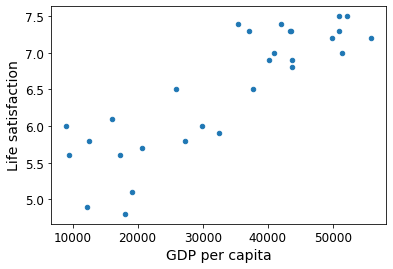

In [22]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

We will use a Linear Regression to train a model. After training the model, let's predict Life Satisfaction for Ghana. According to IMF, in 2015, Ghana's GDP per capita was 1,784 USD (in 2020 it is 2,226 USD).

In [23]:
# Select a linear model
regModel = sklearn.linear_model.LinearRegression()
 
# Train the model
regModel.fit(X, y)
 
# Make a prediction for Ghana
X_new = [[1784]]  # Ghana' GDP per capita
print(X_new)
print(regModel.predict(X_new))

[[1784]]
[[4.94067476]]


🗹 What is the outpot?

The output was 4.94067476

k-Nearest Regression
Previously we a used model-based algorithm - Linear Regression. Now let's try using a instance-based algorithm - k-Nearest Neighbours with 3 neighbours instead.

In [24]:
import sklearn.neighbors
modelKNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
modelKNN.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# Make a prediction for Ghana
X_new = [[1784]]  # Ghana' GDP per capita
print(modelKNN.predict(X_new))

[[5.5]]


🗹 What is your prediction for Ghana's GDP per capita now?
My prediction now 5.5



🗹 Which approach, do you think, would generally make a better prediction? Why?

The Linear regression is a better approach and made a better prediction for the actual value for Ghana

## Polynomial Regression

Predicting life satisfaction based only on GDP per capita does not sound like something that could result in accurate predictions.

🗹 What arguments would you give to support it?
We do not know the actual value so how do we garantee our result is right.

🗹 What could we do to fix this?

Get training sets and testing set to let us know what is the best

We could add more features to our training data and use a multivariate regression - scikit-learn Polynomial Regression.

🗹**⋆ Try to adapt this code to support multiple features. You will need:**

1. Select any other BLI dataset feature you think could be important for your prediction.
2. Adapt `prepare_country_stats`function accordingly. It should result in adding your selected attribute to the `country_stats` dataset.
3. Read and follow examples in *Polynomial Regression*
4. Train a polynomial regression model.
5. Make a prediction for Ghana. Remember, you will also need to provide data for your selected feature.

The other BLI ( Better Life indices) include:
* healthy life expectancy, 
* social support, GDP per capita, 
* the happiness of a country’s children, 
* social capital, 
* the civil economy, 
* the absence of corruption, 
* and subjective well-being

In [26]:
# Select a linear model
regModel = sklearn.linear_model.LinearRegression()
 
# Train the model
regModel.fit(X, y)
 
# Make a prediction for Ghana
X_new = [[1784]]  # Ghana' GDP per capita
#print(X_new)
#print(regModel.predict(X_new))

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)
polyX = poly_reg.fit_transform(X)

#pol_reg = regModel()
regModel.fit(polyX, y)

#print(regModel.predict(X_new))


LinearRegression()

🗹 What's is your output now?

🗹 Do you think it makes a more accurate prediction? Why?

I have not figured this out yet

## Decision Trees

### Setup your exercise
For this exercise we will use Decision Trees for Classification.

Choose a set you like that would be suitable for classification:
* sckit-learn Toy Datasets
* kaggle Datasets

We will also use python-graphviz for visualisation. If you have installed Anaconda for previous Python exercises, you can simply run `conda install python-graphviz` in Anaconda Prompt.

In the example we will use the famous Iris dataset.

Let's prepare our data:

In [27]:
from sklearn.datasets import load_iris
 
iris = load_iris()
X, y = iris.data, iris.target

🗹 How does the dataset look like? What features does it have?

### Training
Next step is to train a Decision Tree model. We will use scikit-learn DecisionTreeClassifier.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
from sklearn import tree
import graphviz
 
treeModel = tree.DecisionTreeClassifier()
treeModel = treeModel.fit(X, y)

Let's see how does Iris data tree looks like.

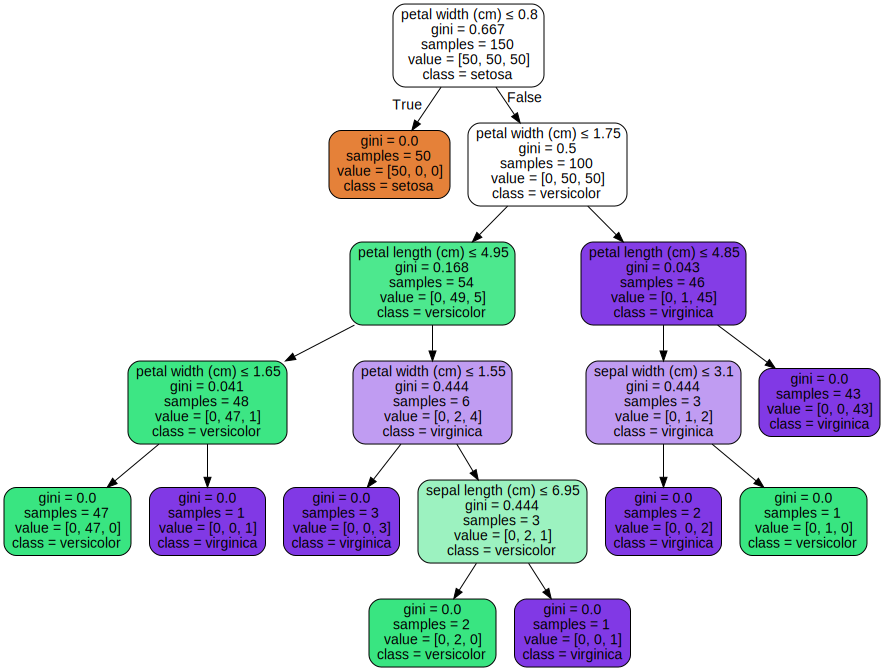

In [34]:
dot_data = tree.export_graphviz(treeModel, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph =graphviz.Source(dot_data)
graph 

In [ ]:
!pip install graphviz

🗹 Which features dictate leaves with the most samples?

🗹 Which Iris class do you get predicting [7.3, 3.4, 6.7, 1.4]?

🗹 What about [3.2, 2.7, 1.7, 0.4]?

Testing
In order to test and evaluate our model, we need to split our dataset into training and testing sets.

scikit-learn has a handy function for that:

In [35]:
from sklearn.model_selection import train_test_split
 
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Now need to retrain our model with the training split.

In [38]:
model = tree.DecisionTreeClassifier()
model = model.fit(train_X, train_y)

We will use sklearn.metrics.accuracy_score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [44]:
from sklearn.metrics import accuracy_score

val_predictions = model.predict(val_X)
 
print("Accuracy:", accuracy_score(val_y, val_predictions))

Accuracy: 0.9736842105263158
